In [2]:
import pandas as pd
import numpy as np
from plotnine import *

%load_ext lab_black

In [10]:
drug_pop = pd.read_csv(
    "https://raw.githubusercontent.com/MIDS-at-Duke/estimating-impact-of-opioids-2020-purlple-team/ssloate/20_intermediate_files/drug_shipment_data.csv?token=ARFW6V6URGBMN5BJCR5LCAS7TBDAM"
)
drug_pop = drug_pop.drop(columns="Unnamed: 0")

In [4]:
# create FL datasets

# Florida: pre and post 2010
FL_policy_year = 2010
FL = drug_pop[drug_pop["State Abbr"] == "FL"]
FL_pre = FL[FL["Year"] < FL_policy_year]
FL_post = FL[FL["Year"] >= FL_policy_year]

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/Opioid Shipments: FL_pre_post


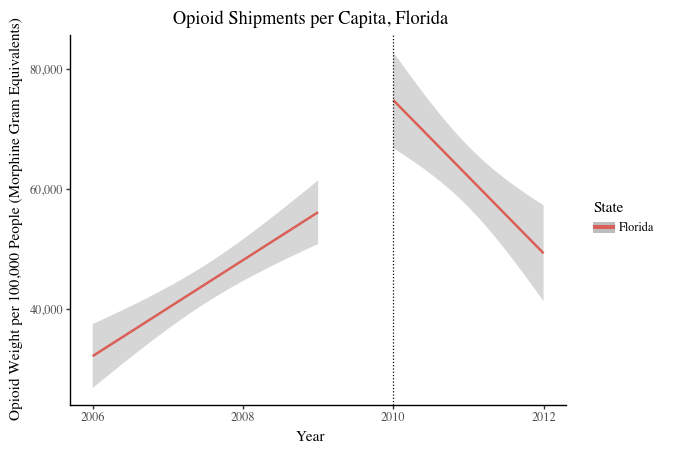

<ggplot: (8776602308305)>


In [5]:
# graph pre-post: Florida
p = (
    ggplot()
    + geom_smooth(FL_pre, aes(x="Year", y="PerCapWeight", color="State"), method="lm")
    + geom_smooth(
        FL_post,
        aes(x="Year", y="PerCapWeight", color="State"),
        method="lm",
    )
    + geom_vline(xintercept=FL_policy_year, linetype="dotted")
    + xlab("Year")
    + ylab("Opioid Weight per 100,000 People (Morphine Gram Equivalents)")
    + theme_classic(base_family="Times")
    + scale_x_continuous(breaks=[2006, 2008, 2010, 2012], limits=[2006, 2012])
    + labs(title="Opioid Shipments per Capita, Florida")
    + scale_y_continuous(
        breaks=[40000, 60000, 80000], labels=["40,000", "60,000", "80,000"]
    )
)
ggsave(
    plot=p,
    filename="Opioid Shipments: FL_pre_post",
    path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results",
    dpi=100,
)

print(p)

In [7]:
# generate pre and post datasets in 2010 for the other states, for Florida shipment DiD
states = drug_pop["State Abbr"].unique()
FL_df_pre = []
FL_df_post = []

# creates list of dataframes with pre 2010 data
for state in states:
    state_code = drug_pop[drug_pop["State Abbr"] == state]
    x = state_code[state_code["Year"] < FL_policy_year]
    # x will be a state for 2010 or lower years
    FL_df_pre.append(x)


# creates list of dataframes with post 2010 data
for state in states:
    state_code = drug_pop[drug_pop["State Abbr"] == state]
    x = state_code[state_code["Year"] >= FL_policy_year]
    # x will be a state for 2010 or lower years
    FL_df_post.append(x)

# create a list of the states
titles = drug_pop["State"].unique()
titles = titles.tolist()

# run checks
assert len(FL_df_pre) == len(FL_df_post)
assert len(FL_df_pre) == len(list(drug_pop["State"].unique()))

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DID/Shipment_Comparison/Opioid Shipment Comparison: FL Arkansas


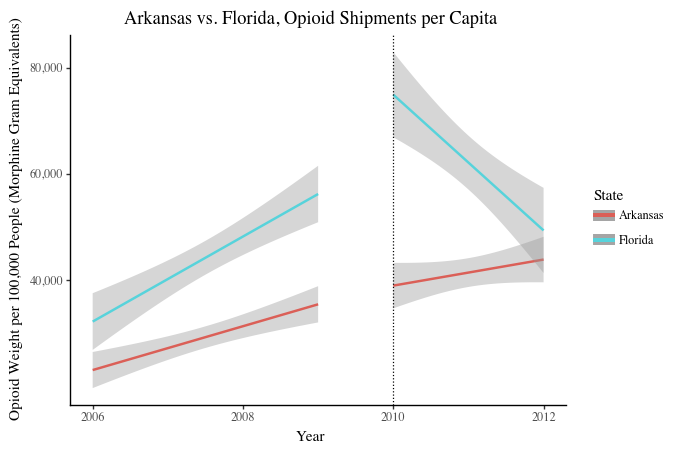

<ggplot: (8776610041577)>


/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DID/Shipment_Comparison/Opioid Shipment Comparison: FL Florida


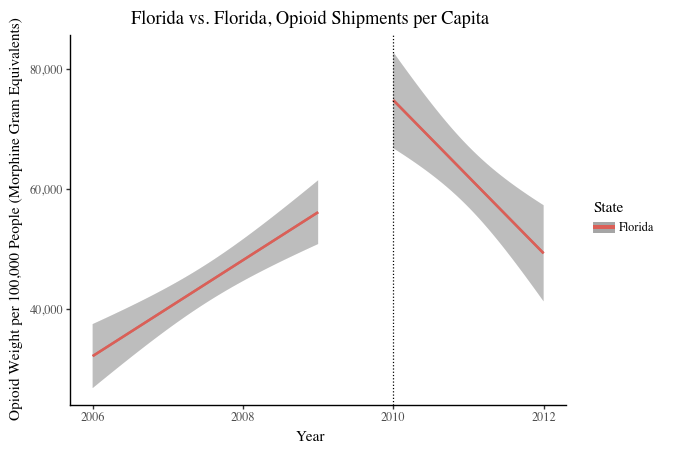

<ggplot: (8776602310385)>


/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DID/Shipment_Comparison/Opioid Shipment Comparison: FL Georgia


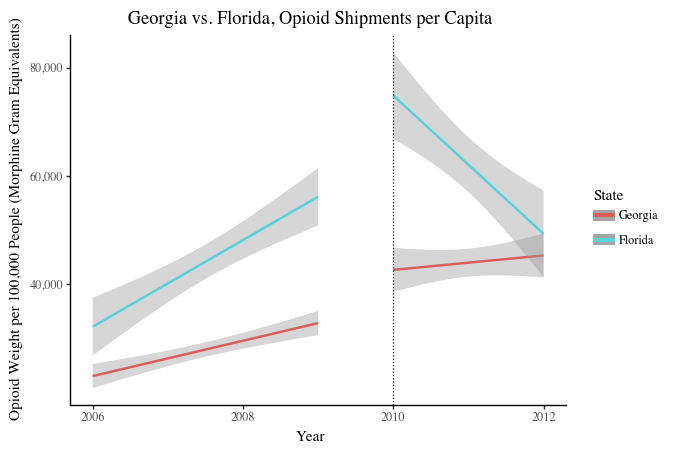

<ggplot: (8776608409845)>


/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DID/Shipment_Comparison/Opioid Shipment Comparison: FL Illinois


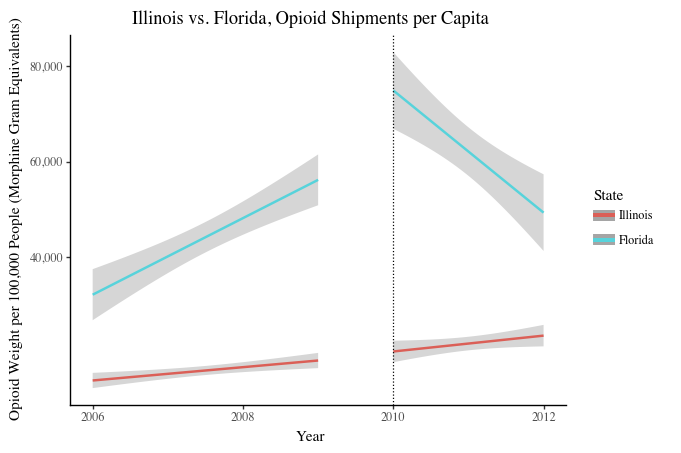

<ggplot: (8776610533097)>


/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DID/Shipment_Comparison/Opioid Shipment Comparison: FL Iowa


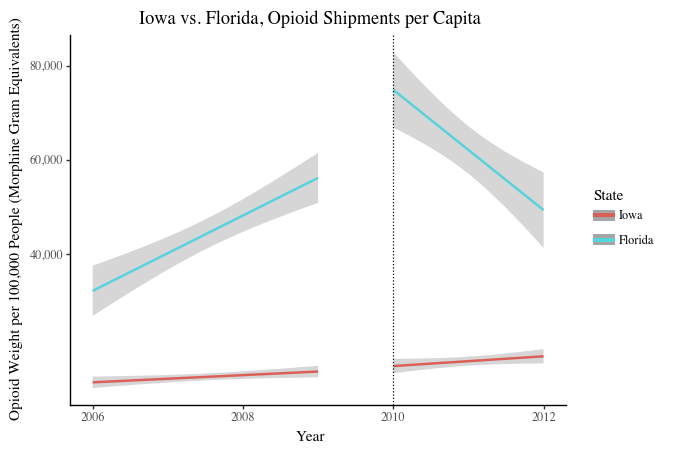

<ggplot: (8776608441561)>


/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DID/Shipment_Comparison/Opioid Shipment Comparison: FL Michigan


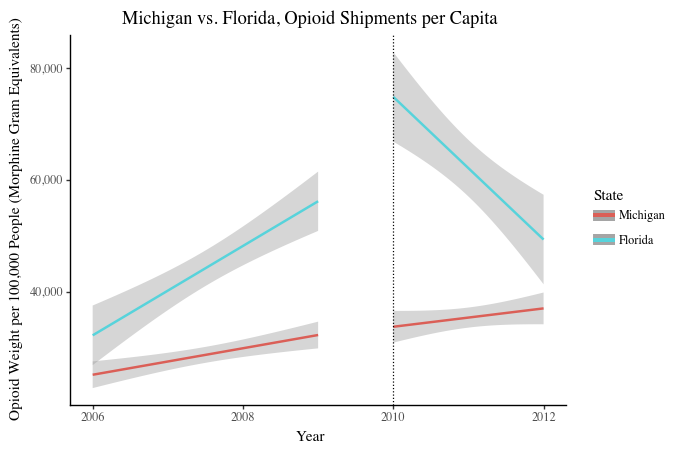

<ggplot: (8776611634181)>


/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DID/Shipment_Comparison/Opioid Shipment Comparison: FL Mississippi


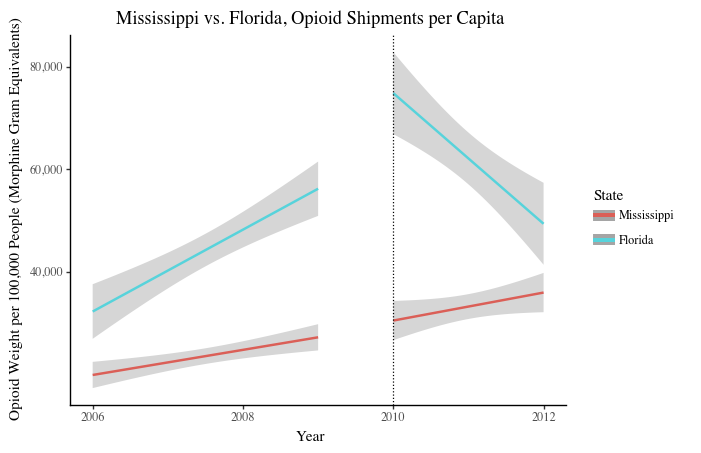

<ggplot: (8776612105181)>


/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DID/Shipment_Comparison/Opioid Shipment Comparison: FL New Hampshire


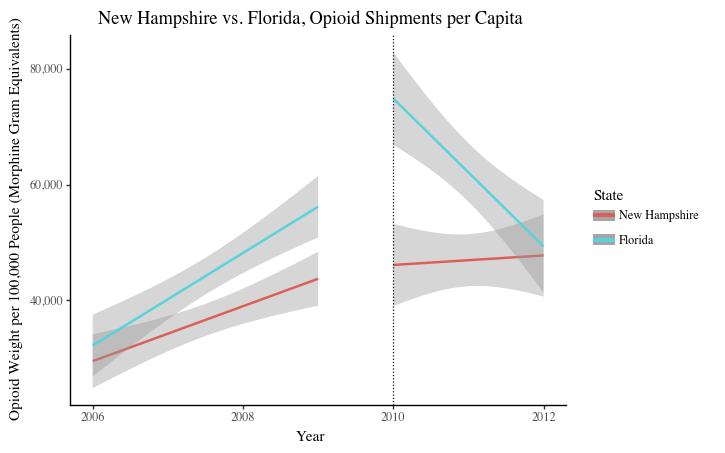

<ggplot: (8776610842905)>


/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DID/Shipment_Comparison/Opioid Shipment Comparison: FL North Carolina


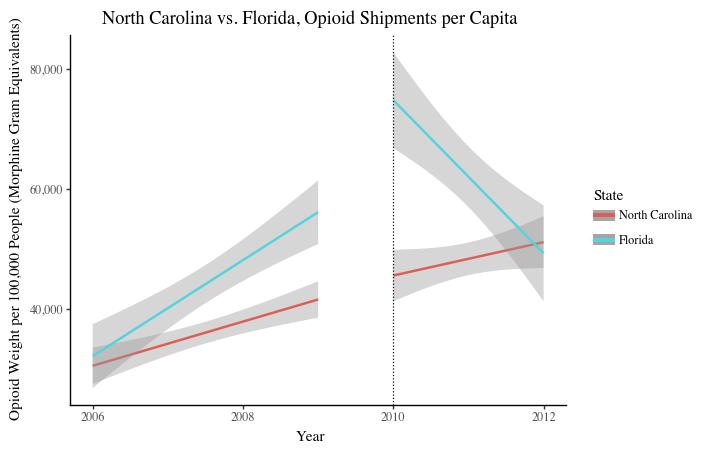

<ggplot: (8776609810805)>


/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DID/Shipment_Comparison/Opioid Shipment Comparison: FL Tennessee


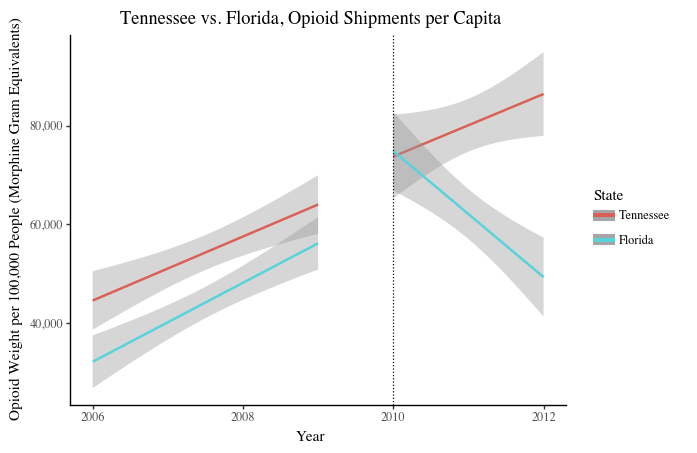

<ggplot: (8776609986273)>


In [8]:
# run a loop to generate DiD comparisons to Florida
pltList = []

for number in range(len(FL_df_pre)):
    p = (
        ggplot()
        + geom_smooth(
            FL_df_pre[number],
            aes(x="Year", y="PerCapWeight", color="State"),
            method="lm",
        )
        + geom_smooth(
            FL_df_post[number],
            aes(x="Year", y="PerCapWeight", color="State"),
            method="lm",
        )
        + geom_smooth(
            FL_pre,
            aes(x="Year", y="PerCapWeight", color="State"),
            method="lm",
        )
        + geom_smooth(
            FL_post,
            aes(x="Year", y="PerCapWeight", color="State"),
            method="lm",
        )
        + geom_vline(xintercept=FL_policy_year, linetype="dotted")
        + xlab("Year")
        + ylab("Opioid Weight per 100,000 People (Morphine Gram Equivalents)")
        + theme_classic(base_family="Times")
        + scale_x_continuous(breaks=[2006, 2008, 2010, 2012], limits=[2006, 2012])
        + labs(title=titles[number] + " vs. Florida, Opioid Shipments per Capita")
        + scale_y_continuous(
            breaks=[40000, 60000, 80000], labels=["40,000", "60,000", "80,000"]
        )
    )
    name = "Opioid Shipment Comparison: FL " + titles[number]
    ggsave(
        plot=p,
        filename=name,
        path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DID/Shipment_Comparison",
    )
    print(p)

In [12]:
# get total deaths in each state per year, for comparison

grouped = drug_pop.groupby(by=["Year", "State", "State Abbr"]).mean()
drug_agg = grouped.reset_index()
drug_agg.head()

,Year,State,State Abbr,FIPS,Total_Weight,Population,PerCapWeight
0,2006.0,Arkansas,AR,5075.000000,9497.705923,37623.480000,23113.606147
1,2006.0,Florida,FL,12068.287879,114729.922401,275071.106061,33461.284783
2,2006.0,Georgia,GA,13160.467532,12846.460882,59305.415584,22952.811709
3,2006.0,Illinois,IL,17102.306931,14112.262391,125112.287129,14258.318998
4,2006.0,Iowa,IA,19099.000000,4499.566429,30127.717172,12605.750270


In [15]:
# For FL comparison: generate average TN, NC, NH, IA, IL, GA data

FL_comp = ["TN", "AR", "GA"]
drug_FL_comp = []
for i in range(len(FL_comp)):
    x = drug_agg[drug_agg["State Abbr"] == FL_comp[i]]
    drug_FL_comp.append(x)
# concat list to dataframe
drug_FL_comp = pd.concat(drug_FL_comp)

In [27]:
# first, get avg of comparison data
x = drug_FL_comp.groupby(by="Year").mean()
x = x.reset_index()
# get data for below policy year and add state column "Aggregate"
x_pre = x[x["Year"] < 2010]
x_pre = x_pre.copy()
x_pre["State"] = "Aggregate Average"
x_post = x[x["Year"] >= 2010]
x_post = x_post.copy()
x_post["State"] = "Aggregate Average"

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DID/Shipments: FL_DiD_aggregates_average


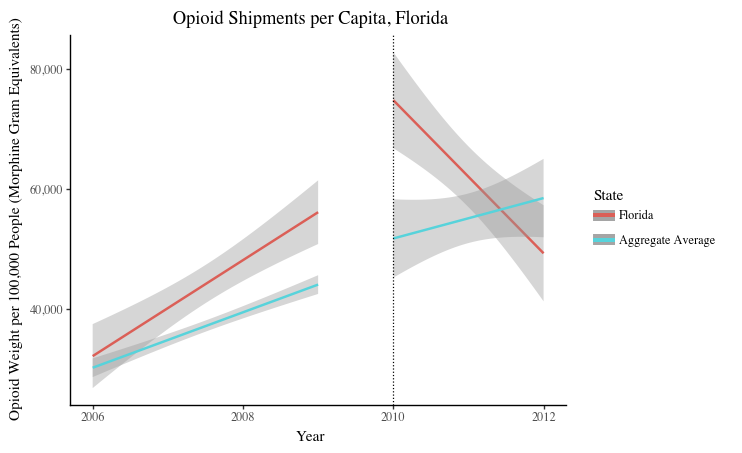

<ggplot: (8776612105121)>


In [35]:
p = (
    ggplot()
    + geom_smooth(FL_pre, aes(x="Year", y="PerCapWeight", color="State"), method="lm")
    + geom_smooth(
        FL_post,
        aes(x="Year", y="PerCapWeight", color="State"),
        method="lm",
    )
    + geom_smooth(
        x_pre,
        aes(x="Year", y="PerCapWeight", color="State"),
        method="lm",
    )
    + geom_smooth(
        x_post,
        aes(x="Year", y="PerCapWeight", color="State"),
        method="lm",
    )
    + geom_vline(xintercept=FL_policy_year, linetype="dotted")
    + xlab("Year")
    + ylab("Opioid Weight per 100,000 People (Morphine Gram Equivalents)")
    + theme_classic(base_family="Times")
    + scale_x_continuous(breaks=[2006, 2008, 2010, 2012], limits=[2006, 2012])
    + labs(title="Opioid Shipments per Capita, Florida")
    + scale_y_continuous(
        breaks=[40000, 60000, 80000, 100000],
        labels=["40,000", "60,000", "80,000", "100,000"],
    )
)
ggsave(
    plot=p,
    filename="Shipments: FL_DiD_aggregates_average",
    path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DID/",
)
print(p)